# Lead Scoring - Case Study

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [201]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [202]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Understanding

In [203]:
# Reading data

df = pd.read_csv("Lead Scoring Assignment/Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [204]:
# Displaying Maximum rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [205]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [206]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [207]:
# Number of rows and columns in dataset

df.shape

(9240, 37)

In [208]:
# Information about numerical columns

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Cleaning Data

In [209]:
# Converting all the values to lower case

df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [210]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   select                             select   
1   india                   select                             select   
2   india  business administration                             select   
3   india    media and advertising                      word of mouth   
4   india                   select                              other   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

                                  Tags      Lead Quality  \
0          interested in other courses  low in relevance   
1                              ringing               NaN   
2  will revert after reading the email          might be   
3                              ringing          not sure   
4  will revert after reading the email          might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                no                        no          select   
1                                no                        no          select   
2                                no                        no  potential lead   
3                            

In [211]:

# Replacing 'Select' with nan

df = df.replace('select',np.nan)

In [212]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   india                      NaN                                NaN   
2   india  business administration                                NaN   
3   india    media and advertising                      word of mouth   
4   india                      NaN                              other   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

                                  Tags      Lead Quality  \
0          interested in other courses  low in relevance   
1                              ringing               NaN   
2  will revert after reading the email          might be   
3                              ringing          not sure   
4  will revert after reading the email          might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                no                        no             NaN   
1                                no                        no             NaN   
2                                no                        no  potential lead   
3                            

In [213]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [214]:
# Dropping Columns having missing values greater than 30%

df.drop(["Lead Profile","City","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score","Tags","Lead Quality"],axis=1,inplace=True)

In [215]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [216]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   india                      NaN                                NaN   
2   india  business administration                                NaN   
3   india    media and advertising                      word of mouth   
4   india                      NaN                              other   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                no                        no   
1                                no                        no   
2                                no                        no   
3                                no                        no   
4                                no                        no   

  I agree to pay the amount through cheque  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   

  A free copy of Mastering The Interview Last 

## Imputing Missing Values

In [217]:
# Checking for categorical variable Specialization

df.Specialization.value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

In [218]:
# Imputing Missing Values For Specialization

df["Specialization"].fillna(df["Specialization"].mode()[0],inplace=True)

In [219]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [220]:
# Dropping "How did you hear about X Education" Column

df.drop("How did you hear about X Education",axis=1,inplace=True)

In [221]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [222]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization What is your current occupation  \
0     NaN       finance management                      unemployed   
1   india       finance management                      unemployed   
2   india  business administration                         student   
3   india    media and advertising                      unemployed   
4   india       finance management                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                no                        no   
1                                no                        no   
2                                no                        no   
3                                no                        no   
4                                no                        no   

  I agree to pay the amount through cheque  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                          

In [223]:
# Imputing Missing Values For Country

df["Country"].fillna(df["Country"].mode()[0],inplace=True)

In [224]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [225]:
# Imputing Missing Values For "What is your current occupation"

df["What is your current occupation"].fillna(df["What is your current occupation"].mode()[0],inplace=True)

In [226]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [227]:
# Imputing Missing Values For "What matters most to you in choosing a course"

df["What matters most to you in choosing a course"].fillna(df["What matters most to you in choosing a course"].mode()[0],inplace=True)

In [228]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [229]:
# Imputing Missing Values For "Lead Source"

df["Lead Source"].fillna(df["Lead Source"].mode()[0],inplace=True)

In [230]:
# Imputing Missing Values For "TotalVisits"

df["TotalVisits"].fillna(df["TotalVisits"].median(),inplace=True)

In [231]:
# Imputing Missing Values For "Page Views Per Visit"

df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(),inplace=True)

In [232]:
# Imputing Missing Values For "TotalVisits"

df["Last Activity"].fillna(df["Last Activity"].mode()[0],inplace=True)

In [233]:
# Checking Percentage of missing values

100*(df.isnull().sum()/df.shape[0])

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [234]:
# Dropping Prospect ID column

df.drop("Prospect ID",axis=1,inplace=True)


## EDA

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

### Univariate Analysis

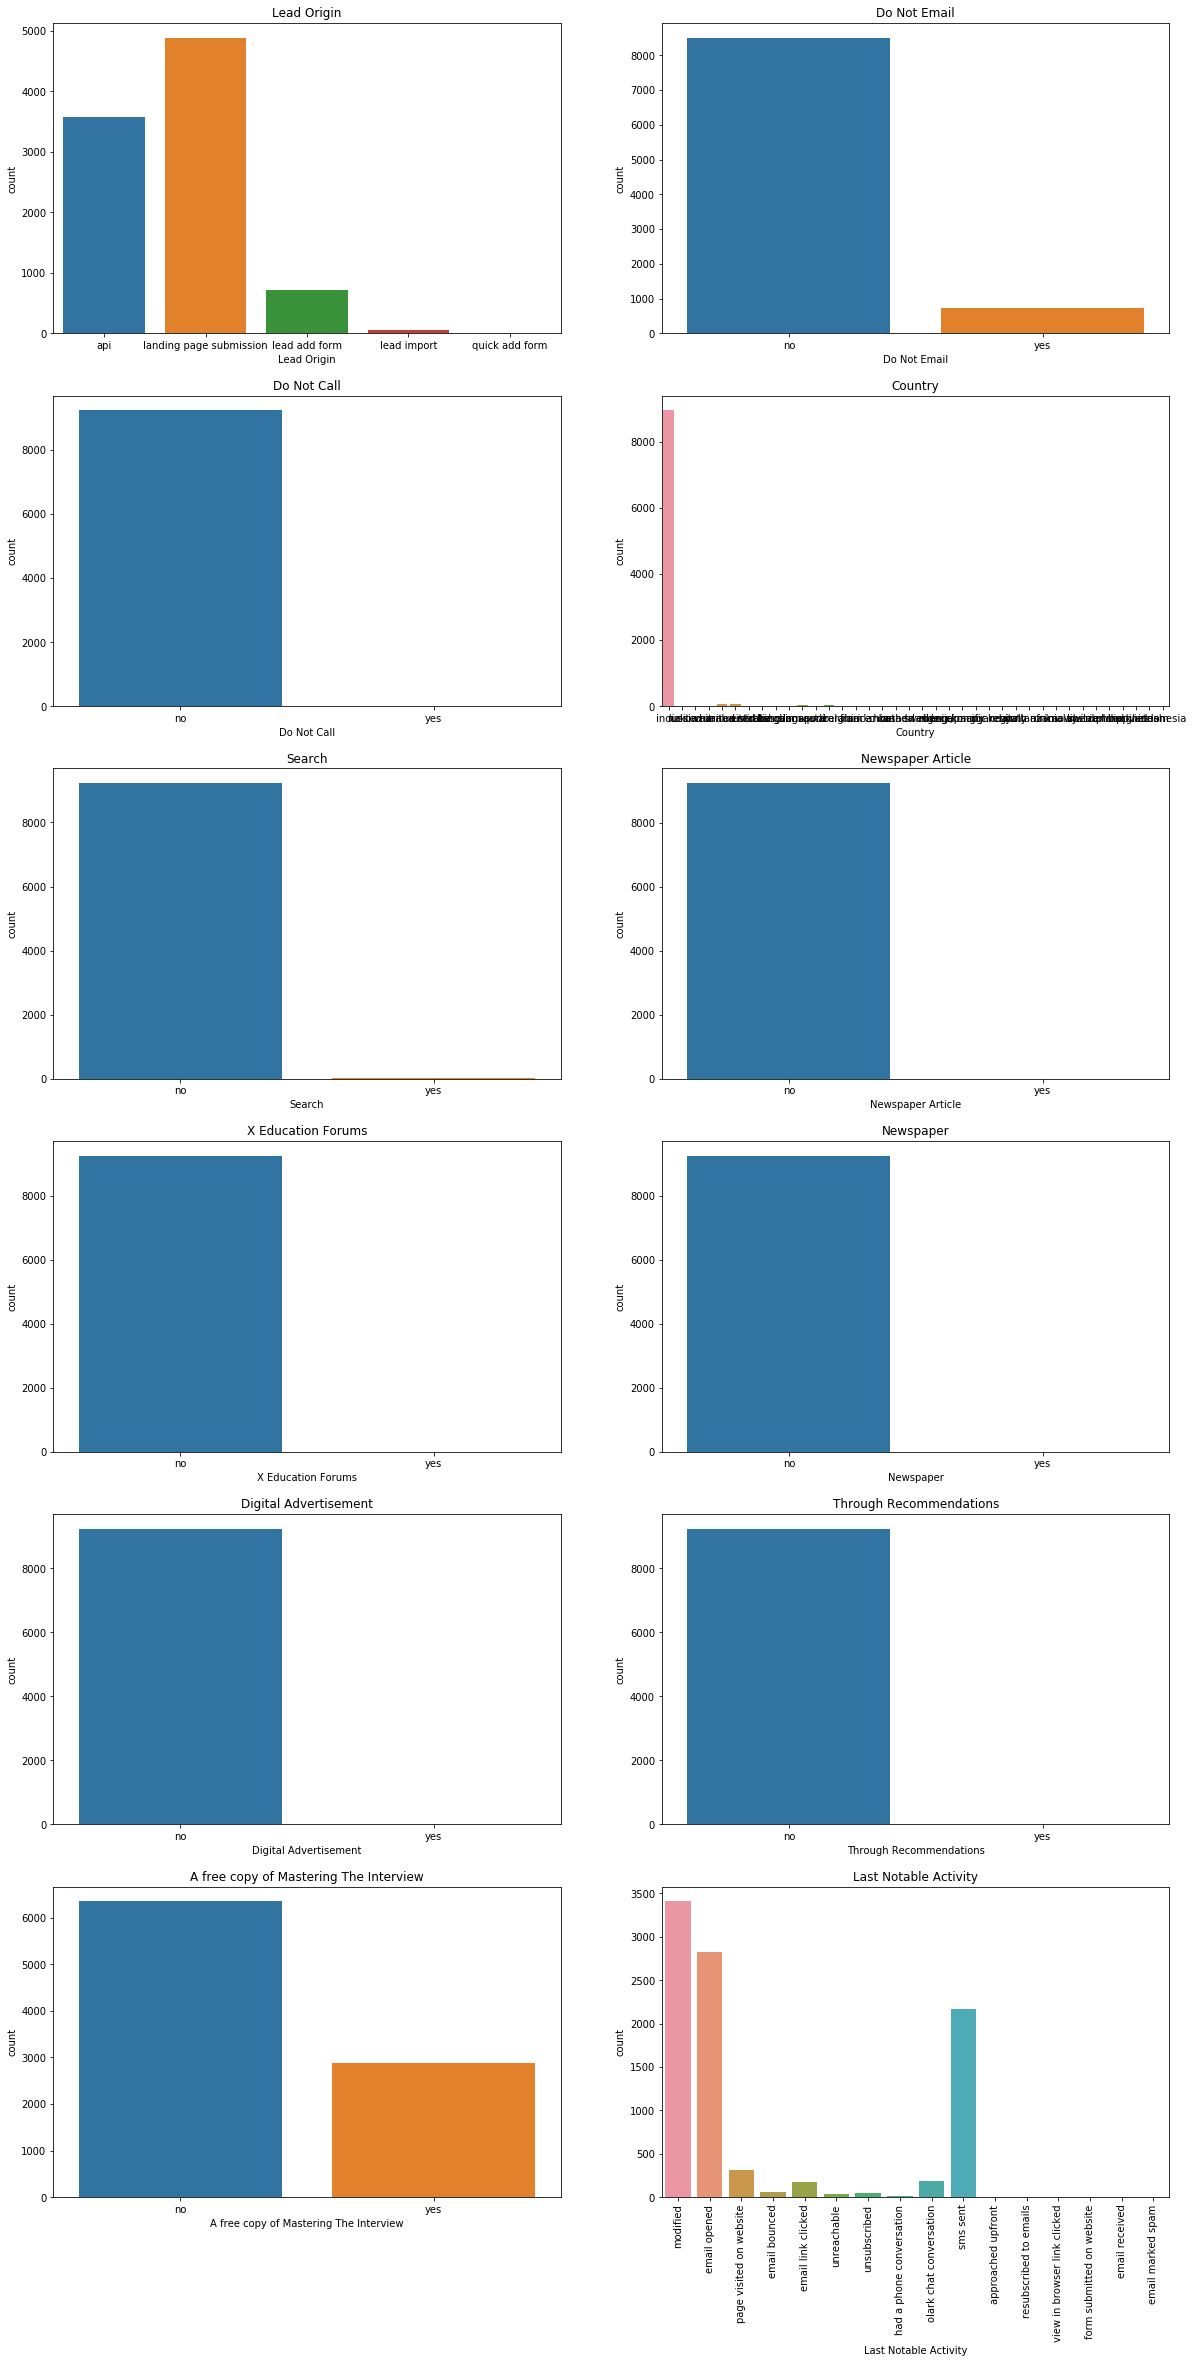

In [236]:
# Subplot of the categorical variables

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

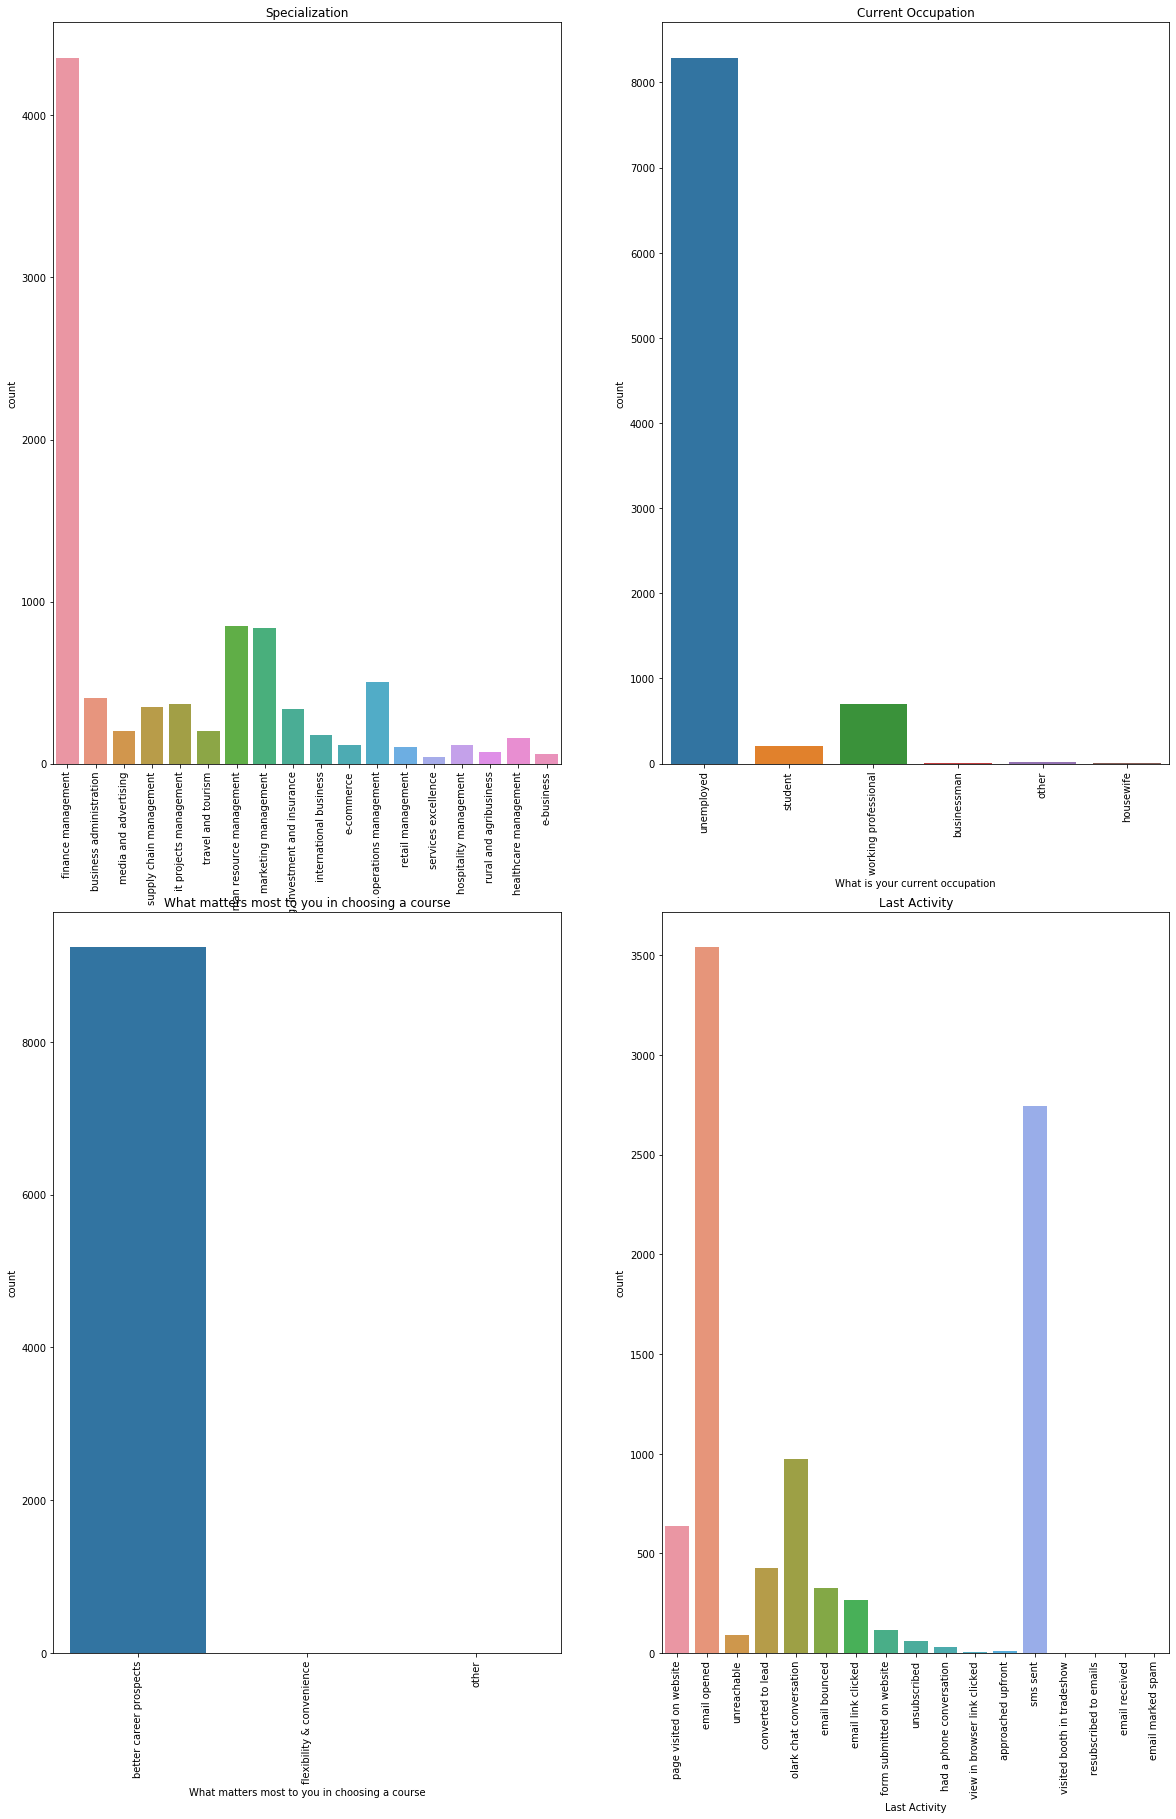

In [237]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

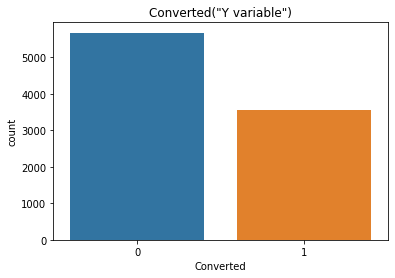

In [238]:
# Countplot of Converted Column

sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [239]:
df.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

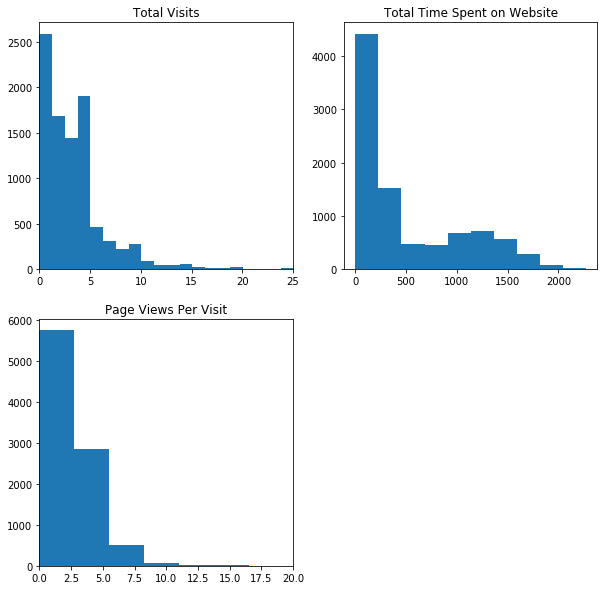

In [240]:
# For Continuous Variables

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Bi-Variate Analysis

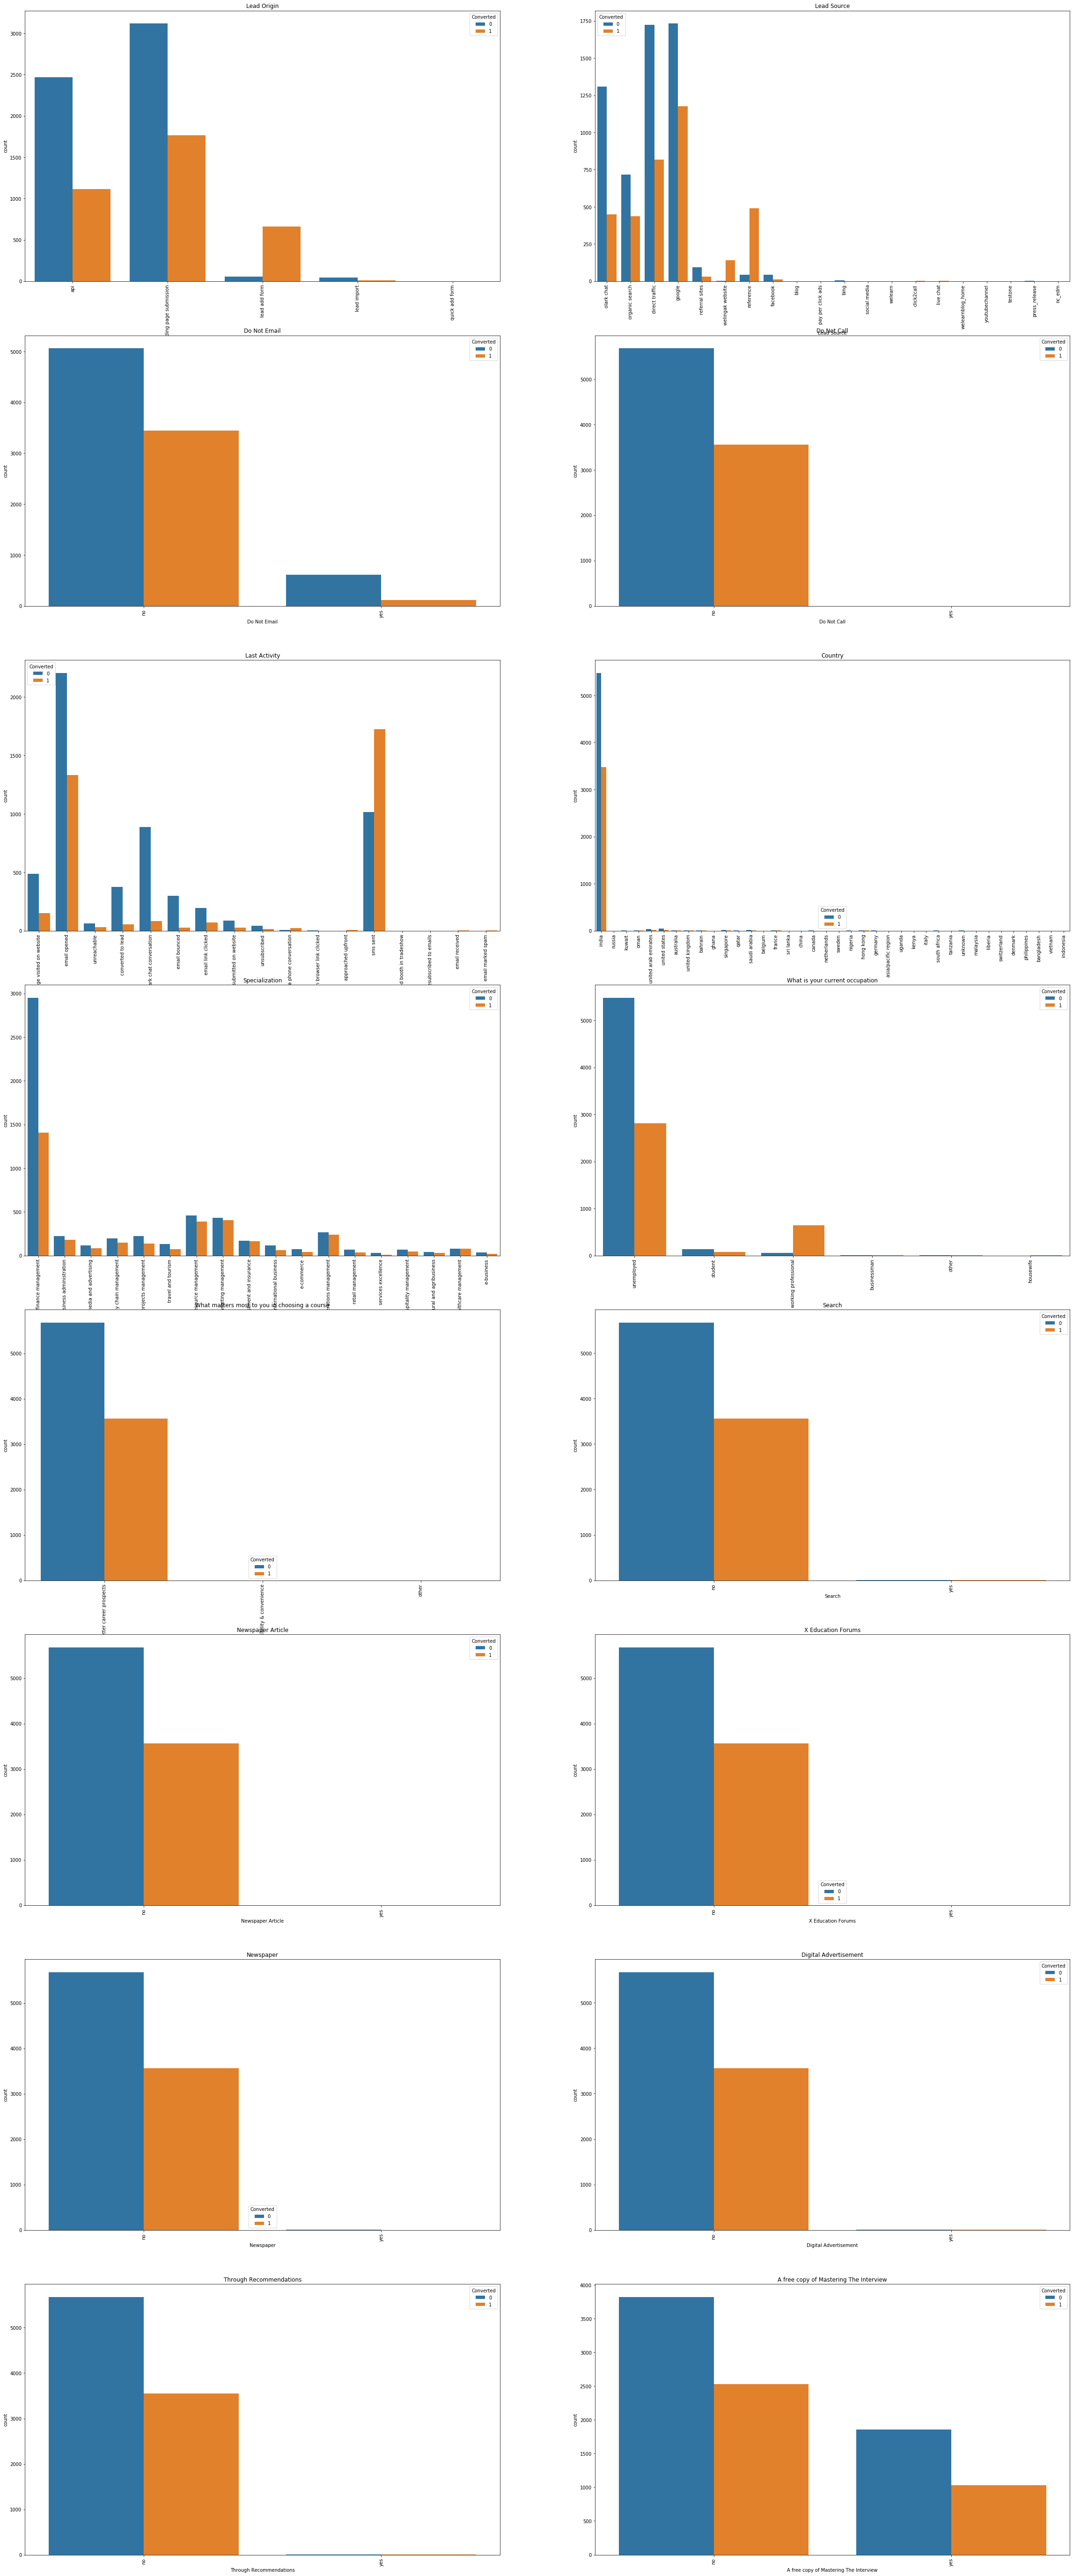

In [241]:
plt.figure(figsize = (40,100))

plt.subplot(8,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(8,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(8,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(8,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(8,2,5)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(8,2,6)
sns.countplot(x='Country', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(8,2,7)
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(8,2,8)
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(8,2,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(8,2,10)
sns.countplot(x='Search', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(8,2,11)
sns.countplot(x='Newspaper Article', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(8,2,12)
sns.countplot(x='X Education Forums', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(8,2,13)
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(8,2,14)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(8,2,15)
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(8,2,16)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()


In [242]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [243]:
dummies = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [244]:
df1 = pd.concat([df,dummies],axis=1)

In [245]:
df1.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      api      olark chat           no   
1       660728                      api  organic search           no   
2       660727  landing page submission  direct traffic           no   
3       660719  landing page submission  direct traffic           no   
4       660681  landing page submission          google           no   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          no          0          0.0                            0   
1          no          0          5.0                          674   
2          no          1          2.0                         1532   
3          no          0          1.0                          305   
4          no          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  page visited on website   india   
1                   2.5             email opened   india   
2                   2.0             email opened   india   
3                   1.0              unreachable   india   
4                   1.0        converted to lead   india   

            Specialization What is your current occupation  \
0       finance management                      unemployed   
1       finance management                      unemployed   
2  business administration                         student   
3    media and advertising                      unemployed   
4       finance management                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                no                        no   
1                                no                        no   
2                                no                        no   
3                                no                        no   
4                                no                        no   

  I agree to pay the amount through cheque  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     no              modified   
1                                     no          email opened   
2                                    yes          email opened   
3                                     no              modified   
4                                     no              modified   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                       

In [246]:
df1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',"Lead Number"],axis=1,inplace=True)

In [247]:
df1.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Origin_quick add form  Lead Source_blog  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_click2call  Lead Source_direct traffic  Lead Source_facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_google  Lead Source_live chat  Lead Source_nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_olark chat  Lead Source_organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_pay per click ads  Lead Source_press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_reference  Lead Source_referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead Source_welearnblog_home  Lead Source_welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3       

In [248]:
df1.shape

(9240, 128)

## Test-Train Split

In [249]:
# Import the required library

from sklearn.model_selection import train_test_split

In [250]:
X = df1.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Origin_quick add form  Lead Source_blog  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_click2call  Lead Source_direct traffic  Lead Source_facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_google  Lead Source_live chat  Lead Source_nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_olark chat  Lead Source_organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_pay per click ads  Lead Source_press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_reference  Lead Source_referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead Source_welearnblog_home  Lead Source_welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4        

In [251]:
y = df1["Converted"]
y

0       0
1       0
2       1
3       0
4       1
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      1
19      0
20      0
21      0
22      1
23      0
24      1
25      1
26      1
27      1
28      0
29      1
30      1
31      0
32      0
33      0
34      1
35      1
36      0
37      1
38      0
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      1
51      0
52      0
53      0
54      0
55      0
56      1
57      1
58      0
59      0
60      0
61      0
62      1
63      0
64      1
65      1
66      1
67      1
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      1
76      1
77      1
78      0
79      1
80      0
81      1
82      1
83      0
84      1
85      0
86      0
87      0
88      1
89      0
90      0
91      1
92      0
93      0
94      0
95      0
96      0
97      0
98      1
99      1


In [252]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [253]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3112     0.007968                     0.182867              0.083333   
8413     0.019920                     0.679538              0.208333   
2961     0.011952                     0.553928              0.041667   
24       0.023904                     0.504660              0.062500   
2740     0.011952                     0.445184              0.125000   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
3112                                    1                          0   
8413                                    1                          0   
2961                                    0                          1   
24                                      0                          0   
2740                                    1                          0   

      Lead Origin_lead import  Lead Origin_quick add form  Lead Source_blog  \
3112                        0                           0                 0   
8413                        0                           0                 0   
2961                        0                           0                 0   
24                          0                           0                 0   
2740                        0                           0                 0   

      Lead Source_click2call  Lead Source_direct traffic  \
3112                       0                           1   
8413                       0                           0   
2961                       0                           0   
24                         0                           0   
2740                       0                           0   

      Lead Source_facebook  Lead Source_google  Lead Source_live chat  \
3112                     0                   0                      0   
8413                     0                   0                      0   
2961                     0                   0                      0   
24                       0                   1                      0   
2740                     0                   0                      0   

      Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
3112                   0                       0                           0   
8413                   0                       0                           1   
2961                   0                       0                           0   
24                     0                       0                           0   
2740                   0                       0                           1   

      Lead Source_pay per click ads  Lead Source_press_release  \
3112                              0                          0   
8413                              0                          0   
2961                              0                          0   
24                                0                          0   
2740                              0                          0   

      Lead Source_reference  Lead Source_referral sites  \
3112                      0                           0   
8413                      0                           0   
2961                      1                           0   
24                        0                           0   
2740                      0                           0   

      Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
3112                         0                    0                    0   
8413                         0                    0                    0   
2961                         0                    0                    0   
24                           0                    0                    0   
2740                         0                    0                    0   

      Lead Source_welearnblog_home  Lead Source_welingak website  \
3112                             0                             0   
8413                             0     

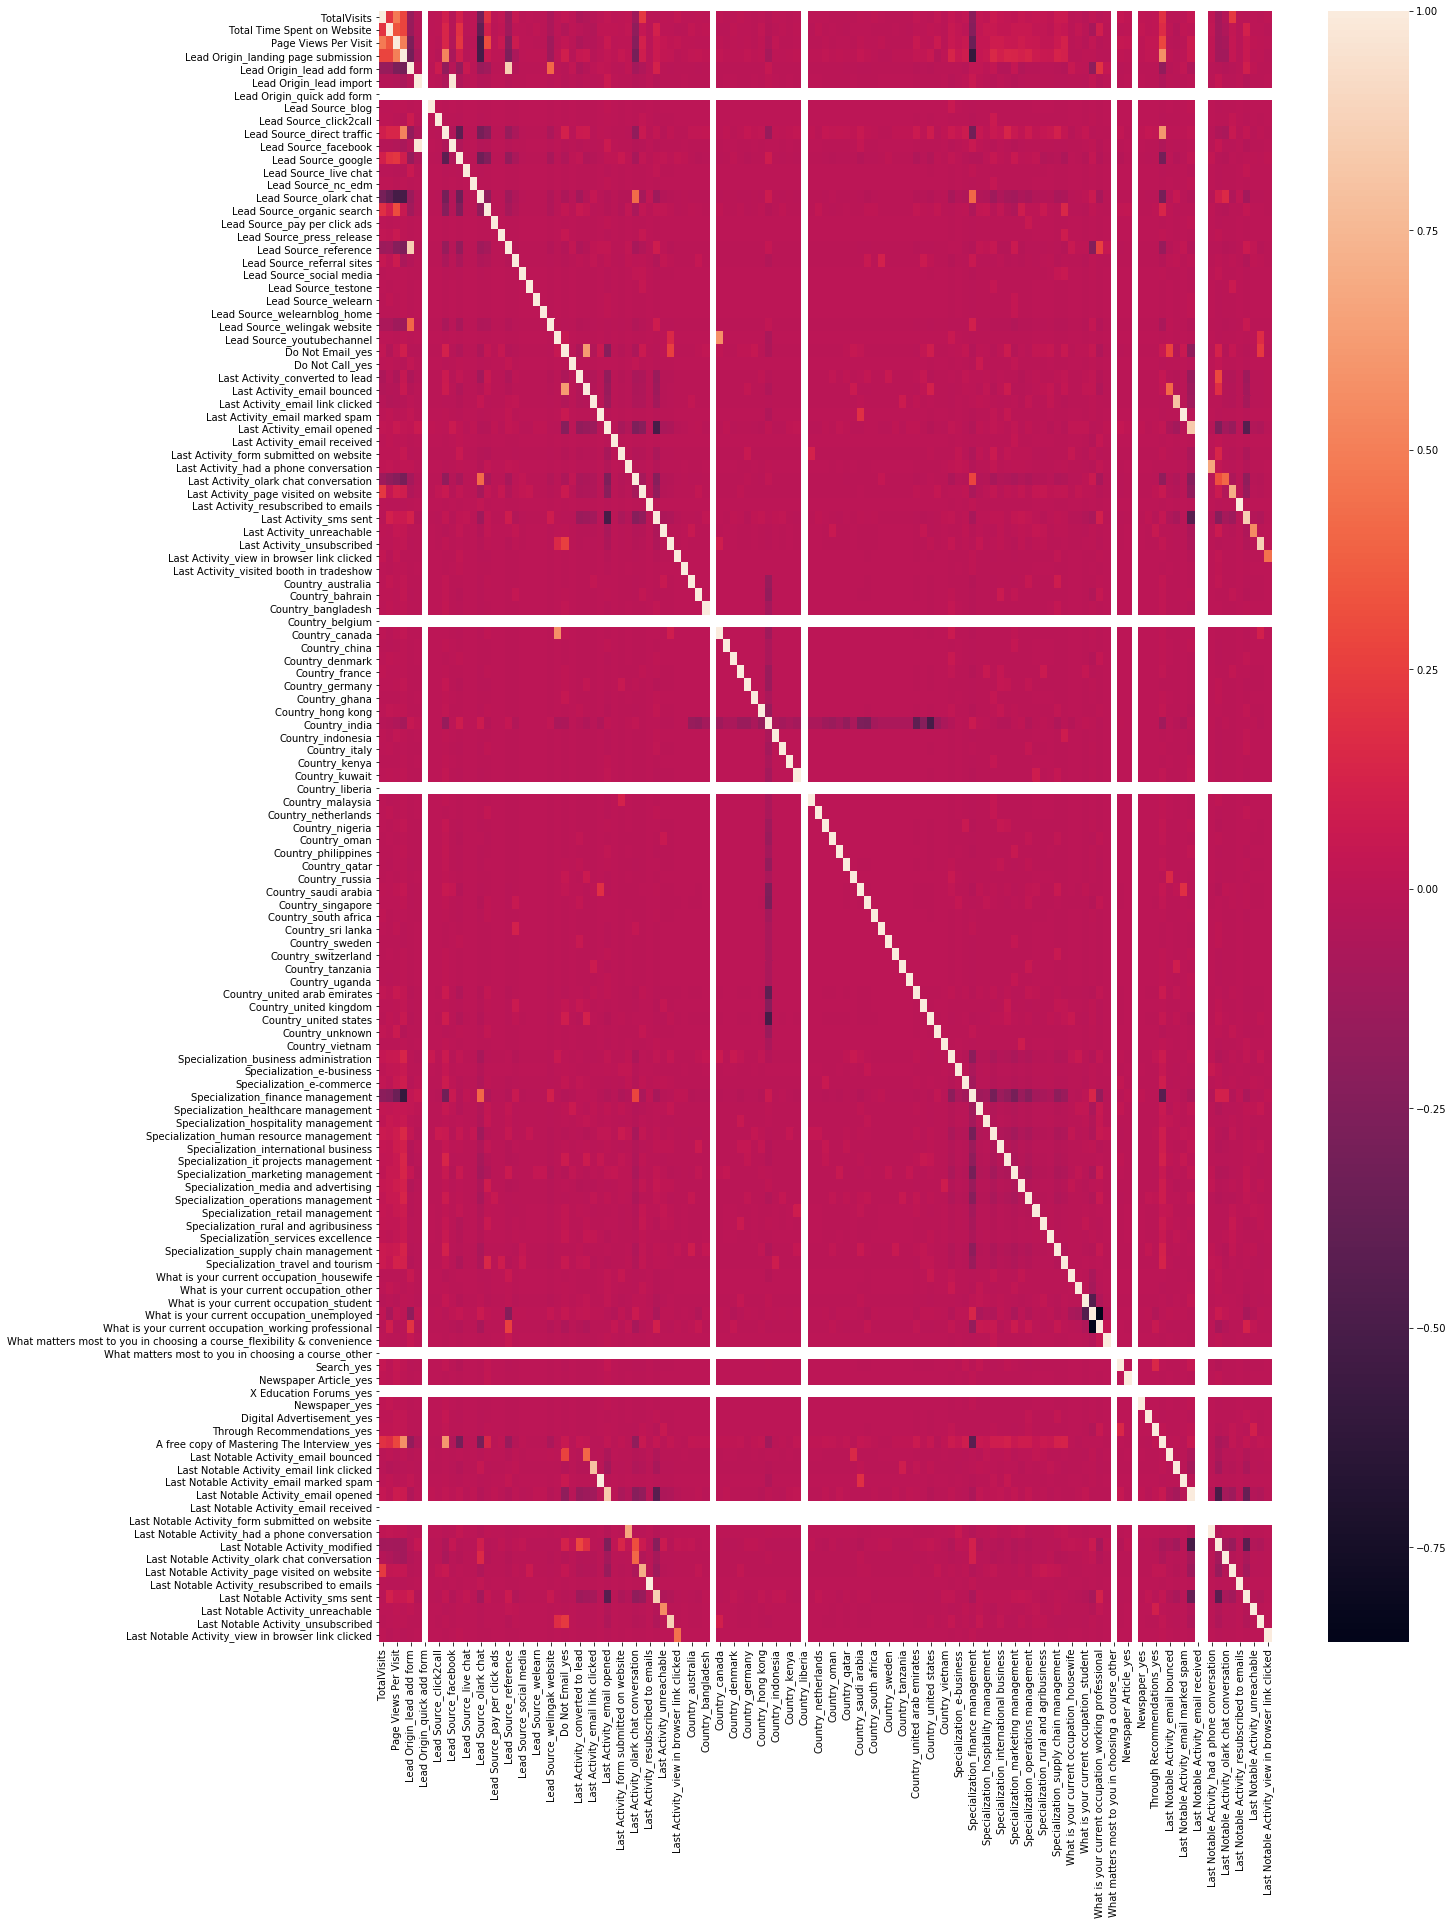

In [254]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [255]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [256]:
# Import RFE

from sklearn.feature_selection import RFE

In [257]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [258]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 22),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 83),
 ('Lead Origin_quick add form', False, 108),
 ('Lead Source_blog', False, 45),
 ('Lead Source_click2call', False, 19),
 ('Lead Source_direct traffic', False, 50),
 ('Lead Source_facebook', False, 84),
 ('Lead Source_google', False, 86),
 ('Lead Source_live chat', False, 74),
 ('Lead Source_nc_edm', False, 34),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 58),
 ('Lead Source_pay per click ads', False, 69),
 ('Lead Source_press_release', False, 75),
 ('Lead Source_reference', False, 94),
 ('Lead Source_referral sites', False, 44),
 ('Lead Source_social media', False, 15),
 ('Lead Source_testone', False, 68),
 ('Lead Source_welearn', False, 40),
 ('Lead Source_welearnblog_home', False, 56),
 ('Lead Source_welingak websi

In [259]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [260]:
# Selecting columns selected by RFE

X_train = X_train[col]

##  Model Building

In [261]:
# Importing statsmodels

import statsmodels.api as sm

In [262]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.3
Date:                Fri, 23 Oct 2020   Deviance:                       5412.6
Time:                        11:54:56   Pearson chi2:                 7.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8975      0.088    -10.192      0.000      -1.070      -0.725
TotalVisits                                              6.4787      2.146      3.019      0.003       2.273      10.684
Total Time Spent on Website                              4.5459      0.163     27.894      0.000       4.227       4.865
Lead Origin_lead add form                                3.9761      0.200     19.845      0.000       3.583       4.369
Lead Source_olark chat                                   1.2090      0.108     11.223      0.000       0.998       1.420
Lead Source_welingak website                             2.6196      1.031      2.541      0.011       0.599       4.641
Do Not Email_yes                                        -1.8028      0.170    -10.612      0.000      -2.136      -1.470
Last Activity_olark chat conversation                   -1.0989      0.185     -5.950      0.000      -1.461      -0.737
Country_italy                                          -24.0173   2.76e+04     -0.001      0.999   -5.42e+04    5.41e+04
What is your current occupation_housewife               22.5696   1.82e+04      0.001      0.999   -3.57e+04    3.58e+04
What is your current occupation_working professional     2.7831      0.184     15.128      0.000       2.422       3.144
Last Notable Activity_email link clicked                -1.9283      0.263     -7.329      0.000      -2.444      -1.413
Last Notable Activity_email opened                      -1.4181      0.088    -16.206      0.000      -1.590      -1.247
Last Notable Activity_modified                          -1.8675      0.095    -19.613      0.000      -2.054      -1.681
Last Notable Activity_olark chat conversation           -1.5289      0.351     -4.359      0.000      -2.216      -0.841
Last Notable Activity_page visited on website           -1.8487      0.202     -9.161      0.000      -2.244      -1.453
========================================================================================================================
"""

In [263]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [264]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6               Last Activity_olark chat conversation  1.89
12                     Last Notable Activity_modified  1.85
1                         Total Time Spent on Website  1.69
0                                         TotalVisits  1.62
3                              Lead Source_olark chat  1.62
11                 Last Notable Activity_email opened  1.48
2                           Lead Origin_lead add form  1.41
13      Last Notable Activity_olark chat conversation  1.32
4                        Lead Source_welingak website  1.24
9   What is your current occupation_working profes...  1.17
14      Last Notable Activity_page visited on website  1.16
5                                    Do Not Email_yes  1.11
10           Last Notable Activity_email link clicked  1.04
8           What is your current occupation_housewife  1.01
7                                       Country_italy  1.00

In [265]:
X_train.drop('Country_italy', axis = 1, inplace = True)

In [266]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.3
Date:                Fri, 23 Oct 2020   Deviance:                       5418.6
Time:                        11:54:56   Pearson chi2:                 7.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9013      0.088    -10.240      0.000      -1.074      -0.729
TotalVisits                                              6.5076      2.149      3.028      0.002       2.295      10.720
Total Time Spent on Website                              4.5366      0.163     27.873      0.000       4.218       4.856
Lead Origin_lead add form                                3.9749      0.200     19.843      0.000       3.582       4.367
Lead Source_olark chat                                   1.2086      0.108     11.223      0.000       0.998       1.420
Lead Source_welingak website                             2.6192      1.031      2.540      0.011       0.598       4.640
Do Not Email_yes                                        -1.7988      0.170    -10.594      0.000      -2.132      -1.466
Last Activity_olark chat conversation                   -1.0996      0.185     -5.956      0.000      -1.462      -0.738
What is your current occupation_housewife               22.5697   1.82e+04      0.001      0.999   -3.57e+04    3.58e+04
What is your current occupation_working professional     2.7836      0.184     15.135      0.000       2.423       3.144
Last Notable Activity_email link clicked                -1.9228      0.263     -7.311      0.000      -2.438      -1.407
Last Notable Activity_email opened                      -1.4123      0.087    -16.156      0.000      -1.584      -1.241
Last Notable Activity_modified                          -1.8614      0.095    -19.568      0.000      -2.048      -1.675
Last Notable Activity_olark chat conversation           -1.5222      0.351     -4.342      0.000      -2.209      -0.835
Last Notable Activity_page visited on website           -1.8432      0.202     -9.138      0.000      -2.239      -1.448
========================================================================================================================
"""

In [267]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6               Last Activity_olark chat conversation  1.89
11                     Last Notable Activity_modified  1.85
1                         Total Time Spent on Website  1.69
0                                         TotalVisits  1.62
3                              Lead Source_olark chat  1.61
10                 Last Notable Activity_email opened  1.48
2                           Lead Origin_lead add form  1.41
12      Last Notable Activity_olark chat conversation  1.32
4                        Lead Source_welingak website  1.24
8   What is your current occupation_working profes...  1.17
13      Last Notable Activity_page visited on website  1.16
5                                    Do Not Email_yes  1.11
9            Last Notable Activity_email link clicked  1.04
7           What is your current occupation_housewife  1.01

In [268]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [269]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.7
Date:                Fri, 23 Oct 2020   Deviance:                       5425.3
Time:                        11:54:57   Pearson chi2:                 7.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9003      0.088    -10.233      0.000      -1.073      -0.728
TotalVisits                                              6.4855      2.146      3.022      0.003       2.280      10.691
Total Time Spent on Website                              4.5362      0.163     27.879      0.000       4.217       4.855
Lead Origin_lead add form                                3.9861      0.200     19.930      0.000       3.594       4.378
Lead Source_olark chat                                   1.2064      0.108     11.209      0.000       0.995       1.417
Lead Source_welingak website                             2.6036      1.031      2.525      0.012       0.583       4.624
Do Not Email_yes                                        -1.8023      0.170    -10.615      0.000      -2.135      -1.470
Last Activity_olark chat conversation                   -1.1067      0.185     -5.996      0.000      -1.468      -0.745
What is your current occupation_working professional     2.7805      0.184     15.120      0.000       2.420       3.141
Last Notable Activity_email link clicked                -1.9231      0.263     -7.310      0.000      -2.439      -1.407
Last Notable Activity_email opened                      -1.4120      0.087    -16.154      0.000      -1.583      -1.241
Last Notable Activity_modified                          -1.8534      0.095    -19.513      0.000      -2.040      -1.667
Last Notable Activity_olark chat conversation           -1.5143      0.351     -4.319      0.000      -2.201      -0.827
Last Notable Activity_page visited on website           -1.8426      0.202     -9.136      0.000      -2.238      -1.447
========================================================================================================================
"""

In [270]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6               Last Activity_olark chat conversation  1.89
10                     Last Notable Activity_modified  1.85
1                         Total Time Spent on Website  1.69
0                                         TotalVisits  1.62
3                              Lead Source_olark chat  1.61
9                  Last Notable Activity_email opened  1.48
2                           Lead Origin_lead add form  1.40
11      Last Notable Activity_olark chat conversation  1.32
4                        Lead Source_welingak website  1.24
7   What is your current occupation_working profes...  1.17
12      Last Notable Activity_page visited on website  1.16
5                                    Do Not Email_yes  1.11
8            Last Notable Activity_email link clicked  1.04

In [271]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.192916
8413    0.909812
2961    0.986128
24      0.532924
2740    0.446352
489     0.065735
9116    0.575920
4176    0.226505
8537    0.654283
6267    0.088058
dtype: float64

In [272]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19291632, 0.90981236, 0.98612813, 0.53292432, 0.44635206,
       0.06573468, 0.57591953, 0.22650462, 0.65428295, 0.08805828])

In [273]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.192916
1          1         0.909812
2          1         0.986128
3          1         0.532924
4          0         0.446352

In [274]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.192916          0
1          1         0.909812          1
2          1         0.986128          1
3          1         0.532924          1
4          0         0.446352          0

## Model Evaluation

In [275]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [276]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3495,  459],
       [ 740, 1774]], dtype=int64)

In [277]:
# Predicted     not_converted    converted
# Actual
# not_converted        3495       459
# converted             740      1774

In [278]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.814625850340136

In [279]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [280]:
# Calculating the sensitivity
TP/(TP+FN)

0.705648369132856

In [281]:
# Calculating the specificity
TN/(TN+FP)

0.8839150227617603

In [282]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [283]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

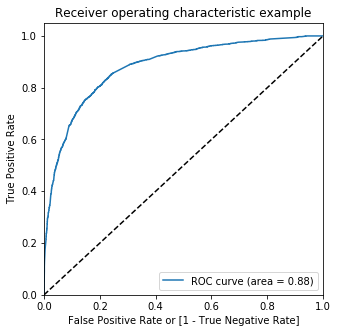

In [284]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [285]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.192916          0    1    1    0    0    0    0    0   
1          1         0.909812          1    1    1    1    1    1    1    1   
2          1         0.986128          1    1    1    1    1    1    1    1   
3          1         0.532924          1    1    1    1    1    1    1    0   
4          0         0.446352          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    0    0    0

In [286]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.586425  0.968178  0.343703
0.2   0.2  0.754793  0.900557  0.662114
0.3   0.3  0.796382  0.840891  0.768083
0.4   0.4  0.808442  0.771679  0.831816
0.5   0.5  0.814626  0.705648  0.883915
0.6   0.6  0.797001  0.591488  0.927668
0.7   0.7  0.782004  0.517900  0.949924
0.8   0.8  0.756648  0.417661  0.972180
0.9   0.9  0.712894  0.279236  0.988619

In [287]:
# Importing plotly

import plotly.express as px

In [288]:
# plotting line graph 

px.line(cutoff_df,x="prob",y=['accuracy','sensi','speci'])

In [289]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.192916          0    1    1    0    0    0    0    0   
1          1         0.909812          1    1    1    1    1    1    1    1   
2          1         0.986128          1    1    1    1    1    1    1    1   
3          1         0.532924          1    1    1    1    1    1    1    0   
4          0         0.446352          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                1  
4    0    0    0                1

In [290]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8056586270871985

In [291]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3215,  739],
       [ 518, 1996]], dtype=int64)

In [292]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [293]:
# Calculating the sensitivity
TP/(TP+FN)

0.7939538583929993

In [294]:
# Calculating the specificity
TN/(TN+FP)

0.8131006575619626

### Precision Recall Tradeoff

In [295]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3495,  459],
       [ 740, 1774]], dtype=int64)

In [296]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7944469323779668

In [297]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.705648369132856

In [197]:
from sklearn.metrics import precision_recall_curve

In [298]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

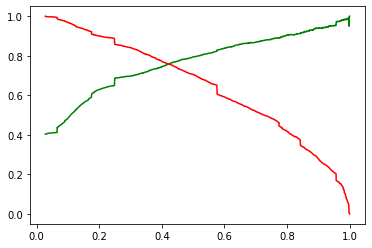

In [299]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [300]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.192916          0    1    1    0    0    0    0    0   
1          1         0.909812          1    1    1    1    1    1    1    1   
2          1         0.986128          1    1    1    1    1    1    1    1   
3          1         0.532924          1    1    1    1    1    1    1    0   
4          0         0.446352          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                1  
4    0    0    0                1

In [301]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8099876314162029

In [302]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3314,  640],
       [ 589, 1925]], dtype=int64)

In [303]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [304]:
# Calculating the sensitivity
TP/(TP+FN)

0.7657120127287191

In [305]:
# Calculating the specificity
TN/(TN+FP)

0.8381385938290339

## Making Predictions on Test Set

In [307]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [308]:
# Substituting all the columns in the final train model
col = X_train.columns

In [310]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
567     1.0     0.015936                     0.147359   
2303    1.0     0.007968                     0.688859   
1523    1.0     0.011952                     0.596538   
6923    1.0     0.019920                     0.083000   
7841    1.0     0.007968                     0.311585   
3036    1.0     0.007968                     0.103862   
2427    1.0     0.023904                     0.051487   
8667    1.0     0.023904                     0.044385   
3245    1.0     0.015936                     0.284510   
1805    1.0     0.011952                     0.164225   
4382    1.0     0.051793                     0.652020   
1419    1.0     0.027888                     0.416334   
8336    1.0     0.000000                     0.000000   
3868    1.0     0.003984                     0.021749   
5920    1.0     0.011952                     0.367510   
5392    1.0     0.003984                     0.157568   
4746    1.0     0.015936                     0.009321   
1579    1.0     0.015936                     0.098535   
2120    1.0     0.000000                     0.000000   
2241    1.0     0.019920                     0.014647   
7732    1.0     0.007968                     0.033289   
100     1.0     0.027888                     0.724811   
665     1.0     0.015936                     0.217044   
578     1.0     0.011952                     0.322237   
7238    1.0     0.019920                     0.471372   
9198    1.0     0.015936                     0.036840   
8095    1.0     0.011952                     0.478029   
5523    1.0     0.003984                     0.036396   
7216    1.0     0.007968                     0.669330   
3297    1.0     0.027888                     0.037727   
8598    1.0     0.000000                     0.000000   
5164    1.0     0.063745                     0.045717   
7401    1.0     0.011952                     0.016866   
1561    1.0     0.000000                     0.000000   
5538    1.0     0.215139                     0.568131   
5318    1.0     0.007968                     0.251664   
8116    1.0     0.011952                     0.200178   
3727    1.0     0.000000                     0.000000   
2208    1.0     0.000000                     0.000000   
8168    1.0     0.051793                     0.109188   
937     1.0     0.035857                     0.418109   
6626    1.0     0.011952                     0.573458   
7471    1.0     0.000000                     0.000000   
4545    1.0     0.063745                     0.109632   
4533    1.0     0.007968                     0.450067   
5549    1.0     0.019920                     0.563249   
6422    1.0     0.000000                     0.000000   
769     1.0     0.011952                     0.148247   
368     1.0     0.000000                     0.000000   
4316    1.0     0.035857                     0.211274   
6846    1.0     0.000000                     0.000000   
7661    1.0     0.000000                     0.000000   
4388    1.0     0.015936                     0.124723   
6711    1.0     0.015936                     0.695961   
4148    1.0     0.019920                     0.260985   
6836    1.0     0.027888                     0.150466   
389     1.0     0.027888                     0.122947   
8785    1.0     0.011952                     0.588105   
5688    1.0     0.000000                     0.000000   
1806    1.0     0.011952                     0.058145   
4666    1.0     0.011952                     0.090546   
6718    1.0     0.019920                     0.038615   
5888    1.0     0.007968                     0.019973   
1612    1.0     0.011952                     0.647581   
6645    1.0     0.000000                     0.000000   
5854    1.0     0.019920                     0.109632   
1651    1.0     0.011952                     0.360408   
1792    1.0     0.031873                     0.310253   
7943    1.0     0.000000                     0.000000   
4564    1.0     

In [311]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.176453
1          0         0.604121
2          0         0.615654
3          0         0.141041
4          0         0.300002

In [312]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.176453                0
1             0         0.604121                1
2             0         0.615654                1
3             0         0.141041                0
4             0         0.300002                0
5             0         0.097003                0
6             1         0.906254                1
7             0         0.123901                0
8             0         0.285278                0
9             1         0.480542                1
10            1         0.916309                1
11            1         0.335289                0
12            0         0.065735                0
13            0         0.067277                0
14            0         0.699361                1
15            0         0.021552                0
16            0         0.319797                0
17            0         0.099440                0
18            0         0.175462                0
19            1         0.107481                0
20            0         0.108159                0
21            0         0.671492                1
22            0         0.010202                0
23            0         0.228896                0
24            1         0.488763                1
25            0         0.114874                0
26            0         0.483399                1
27            0         0.012553                0
28            1         0.582751                1
29            0         0.123429                0
30            0         0.065735                0
31            0         0.019165                0
32            0         0.012104                0
33            1         0.988504                1
34            0         0.955726                1
35            0         0.175134                0
36            0         0.521290                1
37            1         0.956300                1
38            1         0.248622                0
39            0         0.482720                1
40            0         0.454326                1
41            1         0.590600                1
42            1         0.248622                0
43            0         0.025717                0
44            0         0.767261                1
45            1         0.591898                1
46            1         0.996630                1
47            0         0.118804                0
48            0         0.089893                0
49            1         0.572137                1
50            0         0.177037                0
51            0         0.065735                0
52            1         0.927524                1
53            1         0.720709                1
54            0         0.601741                1
55            0         0.131201                0
56            0         0.171677                0
57            1         0.606563                1
58            1         0.774217                1
59            0         0.122271                0
60            0         0.094017                0
61            0         0.083302                0
62            0         0.102469                0
63            1         0.892324                1
64            1         0.842069                1
65            1         0.431964                1
66            1         0.692545                1
67            0         0.242371                0
68            0         0.065735                0
69            1         0.365091                0
70            0         0.574034                1
71            0         0.116798                0
72            0         0.380144                0
73            0         0.097932                0
74            0         0.221315                0
75            0         0.169225                0
76            0         0.085209                0
77            1         0.031148                0
78            0         0.432705                1
79    

In [313]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8084415584415584

In [314]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1442,  283],
       [ 248,  799]], dtype=int64)

In [315]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [316]:
# Calculating the sensitivity
TP/(TP+FN)

0.7631327602674307

In [317]:
# Calculating the specificity
TN/(TN+FP)

0.8359420289855073

## For Lead Conversion X Company should focus on :

- Last activity performed by the customer includes Olark Chat Conversation.

- The last notable acitivity performed by the student would be modified, email opened, olark chat conversation, page visited on website and email link clicked.

- The total time spent by the customer on the website should be more.

- The total number of visits made by the customer on the website.

- The source of the lead were welingak website, Olark Chat.

- The origin identifier with which the customer was identified to be a lead includes only lead add form.

- Customer who is Working Proffesional

- "Do Not Mail is Yes" means customer want to be mail about the course.